<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/02_Avg%2C_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
import re
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('outlier_dataset.csv')

In [40]:
df.head()

,x1,y
0,15.488135,14.236548
1,17.151894,16.458941
2,16.027634,14.375872
3,15.448832,18.917730
4,1.139401,108.474556


In [41]:
px.scatter(df, x='x1', y='y')
ply.show()

RMSE: 79.09227168449162


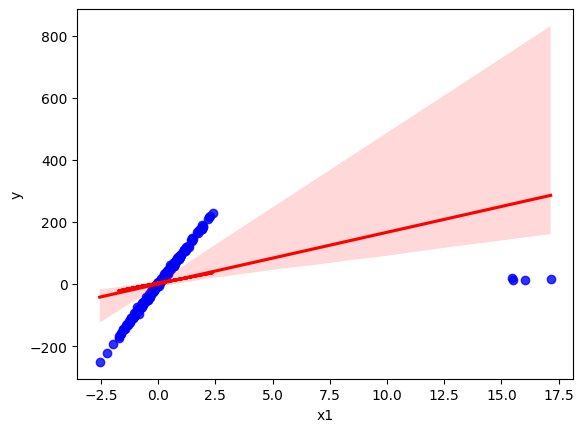

In [42]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(x_train, y_train)

y_pred = elastic.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.show()

RMSE: 91.77576744575744


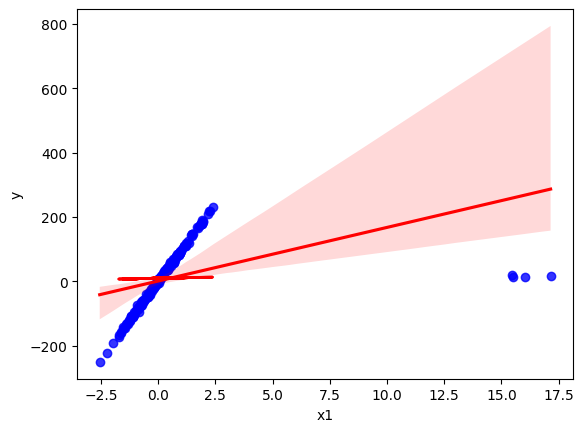

In [43]:
ridge = Ridge(alpha=10000)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.show()

RMSE: 93.27267976131172


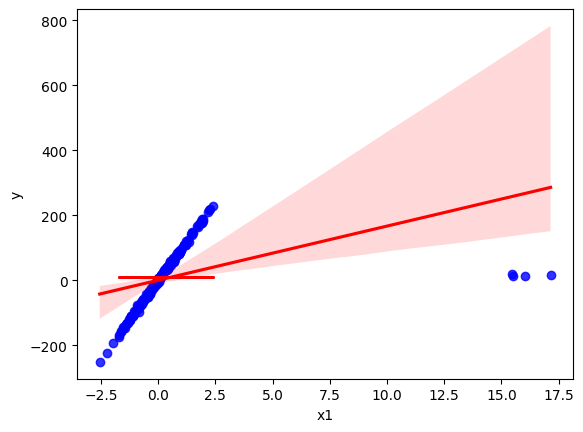

In [44]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=1000)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

RMSE: 4.313048870850949
[93.78333746]
-0.14652164868524653


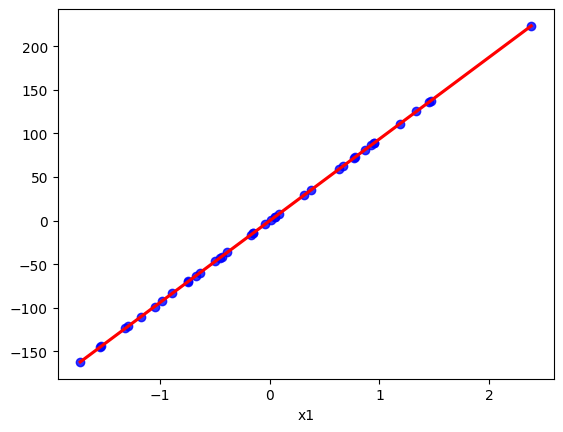

In [68]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

huber = HuberRegressor(epsilon=1.35)
huber.fit(x_train, y_train)

y_pred = huber.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

print(huber.coef_)
print(huber.intercept_)

# plt.plot(x_test, y_pred, color='red', linewidth=2)

# sns.regplot(x='x1', y='y', data=df,
#             scatter_kws={'color': 'blue'},
#             # line_kws={'color': 'red'}
#             )
sns.regplot(x=x_test, y=y_pred, color='red', scatter_kws={'color': 'blue'})

plt.show()

RMSE: 3.8556068941605295
[96.19953348]
-0.08700975367706719


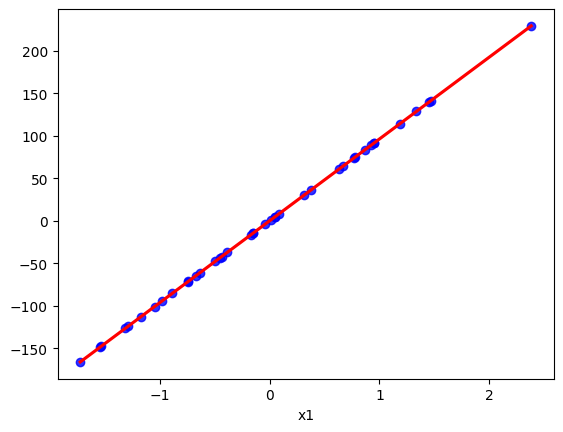

In [70]:
tail = TheilSenRegressor(random_state=42)
tail.fit(x_train, y_train)

y_pred = tail.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

print(tail.coef_)
print(tail.intercept_)

sns.regplot(x=x_test, y=y_pred, color='red', scatter_kws={'color': 'blue'})

plt.show()

In [81]:
X = df[['x1']]
y = df['y']


linear_model = LinearRegression()
linear_model.fit(X, y)

tail = TheilSenRegressor()
tail.fit(X, y)

huber = HuberRegressor()
huber.fit(X, y)

ransac = RANSACRegressor()
ransac.fit(X, y)


linear_rmse = np.sqrt(mean_squared_error(y, linear_model.predict(X)))
tail_rmse = np.sqrt(mean_squared_error(y, tail.predict(X)))
huber_rmse = np.sqrt(mean_squared_error(y, huber.predict(X)))
ransac_rmse = np.sqrt(mean_squared_error(y, ransac.predict(X)))

mae_linear = mean_absolute_error(y, linear_model.predict(X))
mae_tail = mean_absolute_error(y, tail.predict(X))
mae_huber = mean_absolute_error(y, huber.predict(X))
mae_ransac = mean_absolute_error(y, ransac.predict(X))


median_error = median_absolute_error(y, linear_model.predict(X))
median_error_tail = median_absolute_error(y, tail.predict(X))
median_error_huber = median_absolute_error(y, huber.predict(X))
median_error_ransac = median_absolute_error(y, ransac.predict(X))

print('Median Error Linear:', median_error)
print('Linear MAE:', mae_linear)
print('Linear RMSE:', linear_rmse)
print()
print('Median Error RANSAC:', median_error_ransac)
print('RANSAC MAE:', mae_ransac)
print('RANSAC RMSE:', ransac_rmse)
print()
print('Median Error Tail:', median_error_tail)
print('Theil MAE:', mae_tail)
print('Theil RMSE:', tail_rmse)
print()
print('Median Error Huber:', median_error_huber)
print('Huber MAE:', mae_huber)
print('Huber RMSE:', huber_rmse)

Median Error Linear: 61.111986806932016
Linear MAE: 70.47684795490645
Linear RMSE: 87.84258324232447

Median Error RANSAC: 2.80313699184025
RANSAC MAE: 33.6413185524335
RANSAC RMSE: 216.27574085234014

Median Error Tail: 2.890016604283532
Theil MAE: 33.581120918745995
Theil RMSE: 215.63584085626314

Median Error Huber: 3.1276796124134734
Huber MAE: 33.37545948380207
Huber RMSE: 211.5793715520509
